<ipython-input-11-a111b5f8ee0b>:23: RuntimeWarning: divide by zero encountered in log
  F = -R * T * np.log(prob)


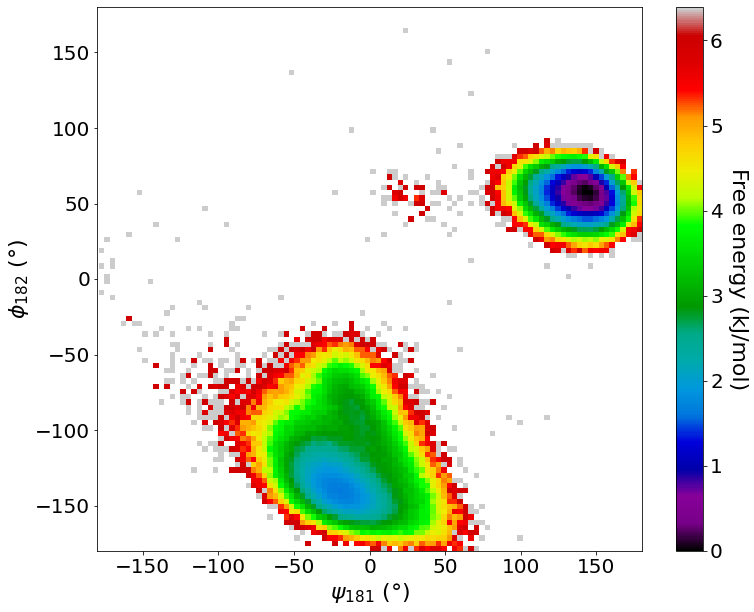

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load generated sample data
file = np.load("results/samples-31_1.npy")

# Vectorized extraction of data columns into separate arrays
generated_nrj, generated_d_181_112, generated_d_181_221, generated_psi_181, generated_phi_182 = file[:, 0].T

# Constants for free energy calculation
R = 8.3145 * 0.001  # kcal/mol/K, gas constant
T = 300  # K, temperature

# 2D Histogram calculation for psi and phi angles
H, bins_x, bins_y = np.histogram2d(generated_psi_181, generated_phi_182, bins=100)

# Calculate probabilities and free energy surface
dx = bins_x[1] - bins_x[0]
dy = bins_y[1] - bins_y[0]
prob = H / (np.sum(H) * dx * dy)

# Avoid -inf in free energy calculation by ensuring prob is non-zero
F = -R * T * np.log(prob)
F -= F.min()  # Normalize to minimum free energy

# Convert bins from radians to degrees for plotting
extent = np.array([bins_x[0], bins_x[-1], bins_y[0], bins_y[-1]]) * 180 / np.pi

# Plot free energy surface
plt.figure(figsize=(12.2, 10))
plt.imshow(F.T / 4.184, origin="lower", extent=extent, cmap="nipy_spectral", aspect="auto")
cbar = plt.colorbar()
plt.xlabel(r"$\psi_{181}$ (°)", fontsize=22)
plt.ylabel(r"$\phi_{182}$ (°)", fontsize=22)
cbar.set_label('Free energy (kJ/mol)', rotation=270, labelpad=25, fontsize=22)
cbar.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.show()